In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<b>Q1. Do smokers have higher insurance charges than non-smokers?

Null Hypothesis: Smokers have the same insurance charges as non-smokers.

Alternative Hypothesis: Smokers have higher insurance charges than non-smokers.

The T-test test should be performed as we are evaluating numeric data (charges) across 2 samples. (smokers/non-smokers)

The standard significance level of alpha = 0.05 will be used.
    

In [4]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [5]:
# Filtering by smoking status
smoke_df = df.loc[df['smoker']== 'yes'].copy()
no_smoke_df = df.loc[df['smoker']== 'no'].copy()

In [6]:
smoke_weight = smoke_df['charges']
no_smoke_weight = no_smoke_df['charges']

In [7]:
# Check for outliers in smokers group
zscores= stats.zscore(smoke_weight)
outliers = abs(zscores)>3
print(np.sum(outliers))

0


In [8]:
# Check for outliers in non smoker group
zscores = stats.zscore(no_smoke_weight)
outliers = abs(zscores)>3
print(np.sum(outliers))

24


In [9]:
# remove outliers
no_smoke_weight = no_smoke_weight[(np.abs(stats.zscore(no_smoke_weight)) < 3)]

In [10]:
# test the smoker group for normality
result_smoke_weight = stats.normaltest(smoke_weight)
print(result_smoke_weight)

result_no_smoke_weight = stats.normaltest(no_smoke_weight)
print(result_no_smoke_weight)

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)
NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)


Neither group is normally distributed, but both groups meet the minimum size of 15 needed to continue with the test.

In [11]:
# Test for equal variance
result = stats.levene(smoke_weight, no_smoke_weight)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

Because the p-value is less than alpha of 0.05, we reject the null hypothesis of equal variance.

However, but we can continue. We just need to be sure to include "equal_var = False" when we perform our t-test.

In [12]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(smoke_weight, no_smoke_weight, equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

Because our p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in insurance charges between smokers and non-smokers.

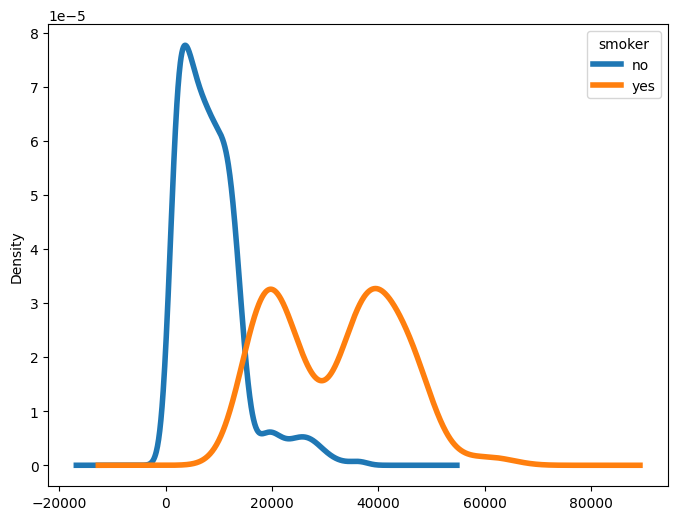

In [13]:
# Converting to wide dataframe
data_wide = df.pivot(columns = 'smoker',
                     values = 'charges')
  
# plotting multiple density plot
data_wide.plot.kde(figsize = (8, 6),
                   linewidth = 4);

<b>Q2. Are men more likely to smoke than women?

Null Hypothesis: Men and women smoke at the same rate.

Alternative Hypothesis: Men are more likely to smoke than women.

The Chi-Squared test should be performed as we are evaluating categorical data (smoker/non-smoker) with 2 samples. (male/female)

The standard significance level of alpha = 0.05 will be used.

In [14]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


At a glance, there are a higher percentage of smokers in the male population. But we will perform a statistical test to confirm significance.

There are two variables measured at a nominal level (smoker/non-smoker and male/female) and the two groups (male/female) are independent so we can proceed with the test.

In [15]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [16]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

Because our p-value is less than 0.05, we reject the null hypothesis and conclude that men are more likely to smoke than women.

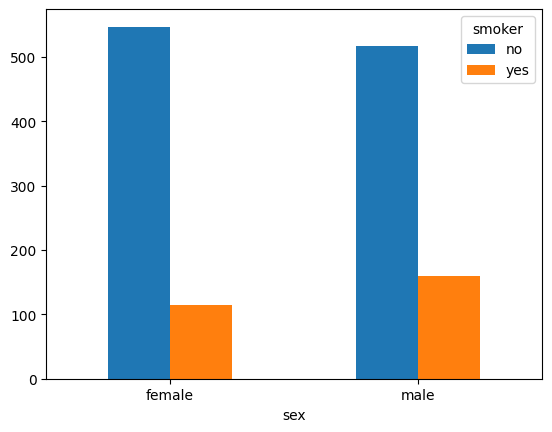

In [17]:
barplot = table.plot.bar(rot=0)

<b> Q3. Do different regions have different charges, on average?

Null Hypothesis: Regions have the same charges on average.

Alternative Hypothesis: The regions DO have different charges, on average.

The standard significance level of alpha = 0.05 will be used.


In [18]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

The ANOVA test should be performed as we are evaluating numerical data (charges) across 4 groups. (region)

In [19]:
# Filtering by region status
southeast_df = df.loc[df['region']== 'southeast'].copy()
southwest_df = df.loc[df['region']== 'southwest'].copy()
northeast_df = df.loc[df['region']== 'northeast'].copy()
northwest_df = df.loc[df['region']== 'northwest'].copy()

In [20]:
southeast_weight = southeast_df['charges']
southwest_weight = southwest_df['charges']
northeast_weight = northeast_df['charges']
northwest_weight = northwest_df['charges']

In [21]:
# Check for outliers by region
zscores= stats.zscore(southeast_weight)
outliers = abs(zscores)>3
print(np.sum(outliers))

2


In [22]:
# remove outliers
southeast_weight = southeast_weight[(np.abs(stats.zscore(southeast_weight)) < 3)]

In [23]:
zscores= stats.zscore(southwest_weight)
outliers = abs(zscores)>3
print(np.sum(outliers))

8


In [24]:
# remove outliers
southwest_weight = southwest_weight[(np.abs(stats.zscore(southwest_weight)) < 3)]

In [25]:
zscores= stats.zscore(northeast_weight)
outliers = abs(zscores)>3
print(np.sum(outliers))

4


In [26]:
# remove outliers
northeast_weight = northeast_weight[(np.abs(stats.zscore(northeast_weight)) < 3)]

In [27]:
zscores= stats.zscore(northwest_weight)
outliers = abs(zscores)>3
print(np.sum(outliers))

7


In [28]:
# remove outliers
northwest_weight = northwest_weight[(np.abs(stats.zscore(northwest_weight)) < 3)]

In [29]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [30]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


No group is normally distributed, but all four groups meet the minimum size of 15 needed to continue with the test.

In [31]:
## Testing assumption of equal variance
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

Because the p-value is less than alpha of 0.05, we reject the null hypothesis of equal variance.

Therefore, at this point we must use the non parametric test version of the One-Way ANOVA test which is the Kruskal-Wallis test.

In [32]:
result = stats.kruskal( *groups.values())
result

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

Because the p-value is greater than alpha of 0.05, we fail to reject the null hypothesis and conclude that average charges do no vary by region.

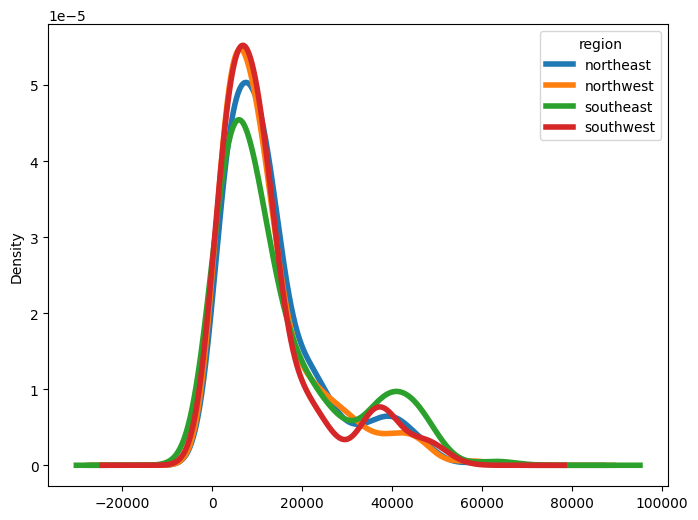

In [33]:
# Converting to wide dataframe
data_wide = df.pivot(columns = 'region',
                     values = 'charges')
  
# plotting multiple density plot
data_wide.plot.kde(figsize = (8, 6),
                   linewidth = 4);